# Design

### Input : 224,224,3

### Conv_Layers:
1. kernel_size = (3,3)
2. padding = Same
3. Stride = 1

### MaxPool Layer
1. kernel_size = (2,2)
2. Stride = 2

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D

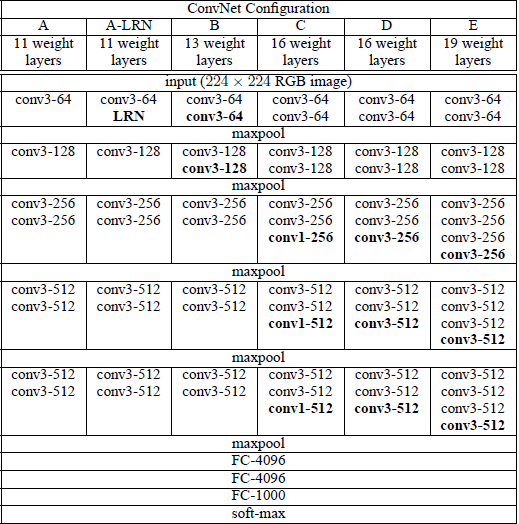

In [5]:
class VGG16():

  def __init__(self,input_shape):
    self.input_shape = input_shape

  def build_model(self):
    inputs = tf.keras.layers.Input(shape=self.input_shape)

    conv1_1 = Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(inputs)
    conv1_2 = Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(conv1_1)

    pool = MaxPool2D(pool_size=(2,2), strides=2)(conv1_2)

    conv2_1 = Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(pool)
    conv2_2 = Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(conv2_1)

    pool = MaxPool2D(pool_size=(2,2), strides=2)(conv2_2)

    conv3_1 = Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(pool)
    conv3_2 = Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(conv3_1)
    conv3_3 = Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(conv3_2)

    pool = MaxPool2D(pool_size=(2,2), strides=2)(conv3_3)

    conv4_1 = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(pool)
    conv4_2 = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(conv4_1)
    conv4_3 = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(conv4_2)

    pool = MaxPool2D(pool_size=(2,2), strides=2)(conv4_3)

    conv5_1 = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(pool)
    conv5_2 = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(conv5_1)
    conv5_3 = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(conv5_2)

    pool = MaxPool2D(pool_size=(2,2), strides=2)(conv5_3)

    dense_1 = Dense(4096)(pool)
    dense_2 = Dense(4096)(dense_1)

    output = Dense(1000,activation="softmax")(dense_2)

    model = tf.keras.Model(inputs= inputs, outputs=output)

    return model

In [6]:
vgg16 = VGG16((224,224,3))

In [7]:
model = vgg16.build_model()

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             